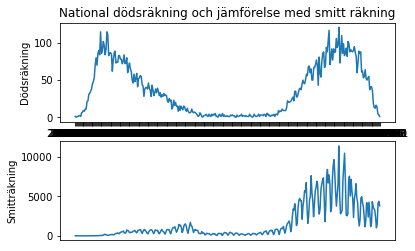

Välkommen åter.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gender = []
genderMF = []
ålder = []
ndd = []
nddDate = []
rdc = []
rdcDate = []

def validate_choice(output, msg): #funktionen ser till att valet man har matat in är rätt
    while True:
        try:
            value = int(input(output))
            break
        except:
            print(msg)
    return value

def choice_1(): #val 1

    lbl = "Smittade \nMän", "Män i \nintensivvård", "Smittade \nKvinnor", "Kvinnor i \nintensivvård"
    lbl2 = "Smitt fall för män", "Smitt fall för kvinnor"

    df = pd.read_csv('Gender_Data.csv')
    mänSmittad = df['Total_Cases'].iloc[0:1].sum()
    mänIntensivvård = df['Total_ICU_Admissions'].iloc[0:1].sum()
    
    kvinnorSmittad = df['Total_Cases'].iloc[1:2].sum()
    kvinnorIntensivvård = df['Total_ICU_Admissions'].iloc[1:2].sum()

    gender.append(mänSmittad)
    gender.append(mänIntensivvård)
    gender.append(kvinnorSmittad)
    gender.append(kvinnorIntensivvård)

    plt.pie(gender, labels=lbl, autopct='%1.1f%%')
    plt.title("COVID-19 Smittfall och intensivvård mellan män och kvinnor")
    plt.axis('equal')

    plt.show()

    ask = ("\nVisa åldergrupp?"
    "\n1 - Ja"
    "\n2 - Nej"
    )

    while True:
        val = validate_choice(ask, "Felaktig val.")

        if val == 1:
            sub_choice1()
        elif val == 2:
            break
        else:
            print("Felaktig val.")

def sub_choice1(): #Delar upp i åldersgrupp via val 1
    lbl = "0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90+"

    df = pd.read_csv('National_Total_Deaths_by_Age_Group.csv')
    for i in df['Total_Cases']:
        ålder.append(i)
    
    plt.bar(lbl, ålder, width=.4, color=["pink", "red", "blue", "green", "yellow", "purple", "cyan", "orange", "indigo", "black"])
    plt.title("Totala smitt räkning bland åldersgrupp")
    plt.show()

    inputThis = "Tryck på 0 för att återgå till huvudmenyn."

    while True:
        val = validate_choice(inputThis, "Felaktig input.")

        if val == 0:
            main()
        else:
            print("Felaktig inmatning.")

def choice_2():

    df = pd.read_csv('National_Daily_Deaths.csv')
    df2 = pd.read_csv('Regional_Daily_Cases.csv')

    for i in df["National_Daily_Deaths"]:
        ndd.append(i)

    for j in df["Date"]:
        nddDate.append(j)

    for y in df2["Sweden_Total_Daily_Cases"]:
        rdc.append(y)

    for x in df2["Date"]:
        rdcDate.append(x)
    
    axisX1 = nddDate
    axisY1 = ndd

    axisX2 = rdcDate
    axisY2 = rdc

    plt.subplot(2,1,1)
    plt.plot(axisX1, axisY1)
    plt.title('National dödsräkning och jämförelse med smitt räkning')
    plt.xlabel('Datum')
    plt.ylabel('Dödsräkning')

    plt.subplot(2,1,2)
    plt.plot(axisX2, axisY2)
    plt.ylabel('Smitträkning')

    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)

    plt.show()

def main():
    while True:
        mainMenu = ("\n========================="
                    "\n-   COVID-19 STATISTIK  -"
                    "\n-  Välkommen till menyn -"
                    "\n========================="
                    "\n\n1 - Gemför kön"
                    "\n2 - National dödsräkning"
                    "\n3 - Daglig smittning"
                    "\nExit. (0)")

        val = validate_choice(mainMenu, "Felaktig val.")

        if val == 0:
            break

        elif val == 1:
            choice_1()

        elif val == 2:
            choice_2()

        else:
            print("Felaktig val.")
main()
print("Välkommen åter.")